In [281]:
import numpy as np
import pandas as pd

In [282]:
df=pd.read_csv("../原始数据/cleaned_customer.csv")

In [283]:
df.head(2)

,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,host_since,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,nearby_sites_rating,nearest_station_dist,nearest_site_dist,nearest_site_rating
0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,2010-10-20,...,10.0,8.0,8.0,f,2,0.02,0.995731,0.617762,4.295315,4.595264
1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,2010-09-08,...,10.0,9.0,9.0,f,1,0.30,1.269606,0.399696,2.039236,4.654423


### 1. 筛选特征 

#### 1.1 主观筛选 

In [284]:
delete_columns=['reviewer_name','name','neighborhood_overview','host_id','host_about','host_neighbourhood',
                'host_has_profile_pic', 'host_identity_verified','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                'calendar_updated','number_of_reviews'
               ]

In [285]:
df2=df.drop(delete_columns,axis=1)

In [286]:
df2.shape

(155250, 48)

In [287]:
df2.columns

Index(['reviewer_id', 'listing_id', 'date', 'comments', 'description',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_verifications', 'neighbourhood', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month',
       'nearby_sites_rating', 'nearest_st

#### 1.2 客观筛选：测试和sentimental score的correlation   <font color=#008000>未完成</font>

### 2. 处理特征 

#### date特征转化为date_time类型

In [288]:
df2["date"]=pd.to_datetime(df2.date)

#### 删除comments, description, host_response_rate, host_response_time空值

In [289]:
df2.dropna(subset=["comments","description", "host_response_rate", "host_response_time"],inplace=True)

#### host_is_superhost特征：填充空值并转化为数字 <font color=#008000>未完成</font>

In [290]:
df2['host_is_superhost']=df2['host_is_superhost'].fillna('f')

In [291]:
df2.host_is_superhost=df2.host_is_superhost.replace({"t":1,
                                                     "f":0})

####  host_response_time特征：categorical转成数字

In [293]:
df2['host_response_time']=df2['host_response_time'].replace({'within an hour': 4,
                                                             'within a few hours': 3,
                                                             'within a day': 2, 
                                                             'a few days or more': 1})

####  host_response_rate：从字符串转化为小数

In [294]:
# host_response_rate convert to numbers
df2['host_response_rate']= df2['host_response_rate'].apply(lambda x:int(x[:-1])/100)

In [295]:
np.corrcoef(df2.host_response_time, df2.host_response_rate)

array([[1.        , 0.60669792],
       [0.60669792, 1.        ]])

说明二者的相关性不是那么强，因此**二者都保留**

#### host_verifications_ways特征：拆分类别变成很多columns

In [296]:
# convert to the number of contact ways
df2['host_verifications_ways'] = df2['host_verifications'].apply(lambda x: len(x.split(',')))

In [297]:
# host_verifications fill na as ''
df2['host_verifications'] = df2['host_verifications'].fillna('')

In [298]:
# create new boolean columns
df2['email']= df2['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
df2['phone']= df2['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
df2['reviews']= df2['host_verifications'].apply(lambda x: 1 if 'reviews' in x else 0)
df2['jumio']= df2['host_verifications'].apply(lambda x: 1 if 'jumio' in x else 0)
df2['offline_government_id']= df2['host_verifications'].apply(lambda x: 1 if 'offline_government_id' in x else 0)
df2['selfie']= df2['host_verifications'].apply(lambda x: 1 if 'selfie' in x else 0)
df2['government_id']= df2['host_verifications'].apply(lambda x: 1 if 'government_id' in x else 0)
df2['identity_manual']= df2['host_verifications'].apply(lambda x: 1 if 'identity_manual' in x else 0)
df2['work_email']= df2['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)
df2['manual_online']= df2['host_verifications'].apply(lambda x: 1 if 'manual_online' in x else 0)
df2['manual_offline']= df2['host_verifications'].apply(lambda x: 1 if 'manual_offline' in x else 0)
# ['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']

In [299]:
df2[['email', 'phone', 'manual_online', 'reviews', 'manual_offline', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']]

,email,phone,manual_online,reviews,manual_offline,jumio,offline_government_id,selfie,government_id,identity_manual,work_email
0,1,1,0,1,0,1,1,1,1,1,0
19,1,1,0,1,0,1,1,1,1,1,0
20,1,1,0,1,0,1,1,1,1,1,0
21,1,1,0,1,0,1,1,1,1,1,0
22,1,1,0,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
155245,1,1,0,0,0,1,1,1,1,1,0
155246,1,1,0,0,0,1,1,1,1,1,0
155247,1,1,0,0,0,1,1,1,1,1,0
155248,0,1,0,0,0,1,1,1,1,1,0


#### neighbourhood <font color=#008000>待处理</font>

####  property_type特征：合并小类 以及 <font color=#008000>未完成onehot</font>

In [300]:
df2['property_type'] = df2['property_type'].str.lower()

In [301]:
def property_type(x):
    if 'apartment' in x:
        return 'apartment'
    elif 'condominium' in x:
        return 'condominium'
    elif 'townhouse' in x:
        return 'townhouse'
    elif 'serviced apartment' in x:
        return 'serviced apartment'
    elif 'boutique hotel' in x:
        return 'boutique hotel'
    elif 'hotel' in x:
        return 'hotel'
    elif 'hostel' in x:
        return 'hostel'
    elif 'loft' in x:
        return 'loft'
    elif 'guest suite' in x:
        return 'guest suite'
    elif 'bed and breakfast' in x:
        return 'bed and breakfast' 
    elif 'bungalow' in x:
        return 'bungalow' 
    elif 'house' in x:
        return 'house'
    elif 'villa' in x:
        return 'house'
    elif x in ['private room in earth house', 'private room', 'camper/rv', 
               'bus', 'shared room in hostel', 'castle', 'cabin', 'tent', 'cottage', 'campsite']:
        return 'other'
    else:
        return x
df2['property_type'] = df2['property_type'].apply(property_type)

In [302]:
df2['property_type'].value_counts()

apartment            81022
condominium          27555
house                13637
townhouse             5929
loft                  5503
hostel                5249
boutique hotel        2377
bungalow              2241
bed and breakfast     1498
other                 1252
hotel                 1031
guest suite            615
boat                   253
Name: property_type, dtype: int64

#### room_type特征：<font color=#008000>还需要做onehot</font>

In [303]:
df2['room_type'].value_counts()

Entire home/apt    73712
Private room       66249
Shared room         6448
Hotel room          1753
Name: room_type, dtype: int64

#### accommodates, bathrooms, bedrooms, beds 特征处理 ：填充空值

空值均用0来填充

可能存在1.5, 2.5等这种小数，这是正常的。(杨大佬解释)

In [304]:
df2["bathrooms"]=df2.bathrooms.fillna(0)
df2["bedrooms"]=df2.bedrooms.fillna(0)
df2["beds"]=df2.beds.fillna(0)

#### amenities特征：将标签提取出来 然后 分类整合 然后 onehot  <font color=#008000>[太多标签了，处理有难度]</font>

In [305]:
df2.amenities.apply(lambda x:len(x.split(","))).value_counts().sort_index(ascending=False)

76      5
75      1
74      3
73      5
70      2
     ... 
5      78
4      87
3      57
2      98
1     236
Name: amenities, Length: 74, dtype: int64

#### price特征：字符串转化为小数  表示住一晚上的价格

In [306]:
df2["price"]=df2.price.apply(lambda x:float(x[1:].replace(",","")))

In [307]:
df2.price.value_counts()

60.0     4308
85.0     3809
50.0     3805
70.0     3257
120.0    2897
         ... 
622.0       1
594.0       1
561.0       1
610.0       1
384.0       1
Name: price, Length: 543, dtype: int64

#### 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights' 等类似特征：删除相关程度高的特征

In [308]:
df3=df[['minimum_nights',
   'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
   'minimum_maximum_nights', 'maximum_maximum_nights',
   'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',]]

In [309]:
df3.head(2)

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
0,180,360,180,180,360,360,180.0,360.0
1,90,730,90,90,730,730,90.0,730.0


In [310]:
df3.isnull().value_counts() #震惊！没有缺失值

minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm
False           False           False                   False                   False                   False                   False                   False                     155250
dtype: int64

In [311]:
corrMatrix=df3.corr()

In [312]:
import seaborn as sn

<AxesSubplot:>

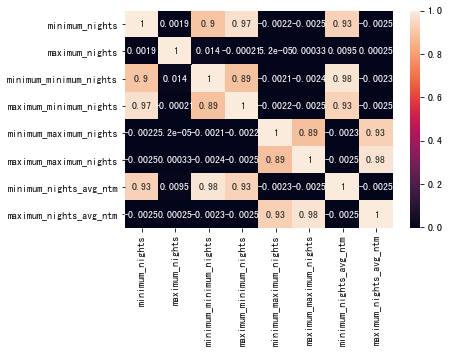

In [313]:
sn.heatmap(corrMatrix,annot=True)

我们发现 "minimum_nights"和'minimum_minimum_nights', 'maximum_minimum_nights'的关联程度特别高

经过严谨的分析，我们保留三个特征：'minimum_nights', 'maximum_nights','maximum_nights_avg_ntm'

因此删除'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights',

'minimum_nights_avg_ntm' 这些特征

In [314]:
df2.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights',
                  'minimum_maximum_nights', 'maximum_maximum_nights',
                  'minimum_nights_avg_ntm'],inplace=True)

####  'availability_30/60/90/365' 系列：整合成一个范围在(0,1)特征

我们已经检查过了，没有缺失值

In [233]:
df2.availability_30 = df2.availability_30/30
df2.availability_60 = df2.availability_60/60
df2.availability_90 = df2.availability_90/90
df2.availability_365 = df2.availability_365/365

In [234]:
df2["availability_average"] = (df2.availability_30+df2.availability_60+df2.availability_90+df2.availability_365)/4

然后删除 availability_30/60/90/365

In [239]:
df2.drop(columns=["availability_30","availability_60","availability_90","availability_365"], inplace=True)

#### number_of_reviews_ltm特征：表示这个房子火爆程度

In [243]:
df2.number_of_reviews_ltm.isnull().value_counts()

False    148162
Name: number_of_reviews_ltm, dtype: int64

#### review_scores_rating系列：删除空值  并 整合这些特征feature cross <font color=#008000>(未完成)</font>

In [247]:
df2[['review_scores_rating',
       #'review_scores_accuracy', 'review_scores_cleanliness',
       #'review_scores_checkin', 'review_scores_communication',
       #'review_scores_location', 'review_scores_value'
    ]].isnull().value_counts()

review_scores_rating
False                   147875
True                       287
dtype: int64

我们发现缺失值较少，因此这些特征的空值的样本都删除

In [258]:
df2.dropna(subset=['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],inplace=True)

In [260]:
df2.shape

(147848, 55)

#### instant_bookable特征 : 将T和F转化为数字

In [263]:
df2.instant_bookable.isnull().value_counts()

False    147848
Name: instant_bookable, dtype: int64

In [264]:
df2.instant_bookable=df2.instant_bookable.apply(lambda x:1 if x=="t" else 0)

#### calculated_host_listings_count特征

In [268]:
df2.calculated_host_listings_count.isnull().value_counts()

False    147848
Name: calculated_host_listings_count, dtype: int64

#### reviews_per_month特征

In [271]:
df2.reviews_per_month.isnull().value_counts()

False    147848
Name: reviews_per_month, dtype: int64

### 3.导出文件

In [ ]:
df2.to_csv("customers_final_version.csv",index=False)